In [ ]:
## Processes module 5
# outputs CSES_int_5 dataframe ready to be appended to the CSES IMD dataset
# also outputs the CSES_int_final dataframe of CSES IMD with module 5 appended and dtypes cleaned up a little

In [51]:
%%time
%matplotlib inline
%run Prosser_header.py

Toggle code

Wall time: 8 ms


In [52]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [53]:
CSES_int = pd.read_stata(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

In [54]:
CSES_5 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")

In [55]:
# IMD5059_2
# E5081

In [56]:
# CSES_5["E5081"]

In [57]:
# CSES_int_5 = pd.DataFrame()
CSES_int_5 = CSES_int.loc[[]].copy()

In [58]:
Int_variable_df_fi = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"Int_variable_df_filledin.csv")

In [59]:
Int_variable_df_fi["var_descr_E"].isnull().sum()

21

In [60]:
int_or_ds_specific = (Int_variable_df_fi["INT_only"].notnull() | Int_variable_df_fi["Dataset_specific"].notnull())

In [61]:
Int_variable_df_fi[int_or_ds_specific&Int_variable_df_fi["var_descr_E"].notnull()]

,Unnamed: 0,description,20% matching contents_A,20% matching contents(length)_A,Top Score_A,Top Match_A,20% matching contents_B,20% matching contents(length)_B,Top Score_B,Top Match_B,...,var_descr_C,var_descr_D,var_descr_E,Match_A_discrepancy,Match_B_discrepancy,Match_C_discrepancy,Match_D_discrepancy,INT_only,Dataset_specific,notes
0,IMD1001,dataset,{},0,NaN,NaN,{},0,NaN,NaN,...,C1001,D1001,E1001,NaN,NaN,NaN,NaN,NaN,x,NaN
1,IMD1002_VER,DATASET VERSION,{},0,NaN,NaN,{},0,NaN,NaN,...,C1002_VER,D1002_VER,E1002_VER,NaN,NaN,NaN,NaN,NaN,x,NaN
2,IMD1002_DOI,DIGITAL OBJECT IDENTIFIER,{},0,NaN,NaN,{},0,NaN,NaN,...,C1002_DOI,D1002_DOI,E1002_DOI,NaN,NaN,NaN,NaN,NaN,x,NaN
29,IMD1014_1,INTERVIEW TIMING - NUMBER OF DAYS BETWEEN INTE...,{'A2026': 0.515839061673797},1,0.515839,A2026,{'B2032': 0.5855795567729084},1,0.585580,B2032,...,C2032,D1029,E1035_1,NaN,NaN,NaN,NaN,x,NaN,NaN
30,IMD1014_2,INTERVIEW TIMING - NUMBER OF DAYS BETWEEN INTE...,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E1035_2,NaN,NaN,NaN,NaN,x,NaN,NaN
33,IMD1016_2,MODE OF INTERVIEW - STUDY SECOND,{},0,NaN,NaN,"{'B3020': 0.8771632221115537, 'B3008': 0.83414...",22,0.877163,B3020,...,NaN,NaN,E1024_2,NaN,NaN,NaN,NaN,x,NaN,NaN
34,IMD1016_3,MODE OF INTERVIEW - STUDY THIRD,{},0,NaN,NaN,"{'B3020': 1.0, 'B3008': 0.9334225597609562, 'B...",22,1.000000,B3020,...,NaN,NaN,E1024_3,NaN,NaN,NaN,NaN,x,NaN,NaN
117,IMD5000_A,PARTY A IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_A,NaN,NaN,NaN,NaN,x,NaN,NaN
118,IMD5000_B,PARTY B IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_B,NaN,NaN,NaN,NaN,x,NaN,NaN
119,IMD5000_C,PARTY C IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_C,NaN,NaN,NaN,NaN,x,NaN,NaN


In [62]:
Int_variable_df_fi[ Int_variable_df_fi["var_descr_E"].isnull() & ~int_or_ds_specific ]

,Unnamed: 0,description,20% matching contents_A,20% matching contents(length)_A,Top Score_A,Top Match_A,20% matching contents_B,20% matching contents(length)_B,Top Score_B,Top Match_B,...,var_descr_C,var_descr_D,var_descr_E,Match_A_discrepancy,Match_B_discrepancy,Match_C_discrepancy,Match_D_discrepancy,INT_only,Dataset_specific,notes
35,IMD2001_1,AGE OF RESPONDENT (IN YEARS),{'A2001': 0.959428928519925},1,0.959429,A2001,{'B2001': 0.9631318476095617},1,0.963132,B2001,...,C2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In mod 4/5, it becomes date of birth 2001_M,20..."
55,IMD3002_UH_DC_3,CURRENT UPPER HOUSE ELECTION: VOTE CHOICE - DI...,{},0,NaN,NaN,{},0,NaN,NaN,...,C3023_UH_DC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,IMD3002_UH_DC_4,CURRENT UPPER HOUSE ELECTION: VOTE CHOICE - DI...,{},0,NaN,NaN,{},0,NaN,NaN,...,C3023_UH_DC_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,IMD3004_UH_DC_3,PREVIOUS UPPER HOUSE ELECTION: VOTE CHOICE - D...,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,IMD3013_2,STATE OF ECONOMY - BETTER,{'A3024': 0.25086125398580333},1,0.250861,A3024,"{'B3020': 0.9991284860557769, 'B3008': 0.93255...",22,0.999128,B3020,...,NaN,D3003_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,IMD3013_3,STATE OF ECONOMY - WORSE,{'A3025': 0.22650579243378358},1,0.226506,A3025,"{'B3020': 0.9891060756972112, 'B3008': 0.92252...",22,0.989106,B3020,...,NaN,D3003_3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
109,IMD3015_1,DICHOTOMIZED POLITICAL INFORMATION ITEM - 1ST,"{'A2023': 0.5196365908763159, 'A2024': 0.29665...",3,0.519637,A2023,"{'B3047_1': 0.7850317480079682, 'B3047_2': 0.5...",3,0.785032,B3047_1,...,C3036_1,D3025_1_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,IMD3015_2,DICHOTOMIZED POLITICAL INFORMATION ITEM - 2ND,"{'A2024': 0.35490073547084555, 'A2023': 0.2966...",2,0.354901,A2024,"{'B3047_2': 0.6104488296812749, 'B3047_1': 0.5...",3,0.610449,B3047_2,...,C3036_2,D3025_2_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,IMD3015_3,DICHOTOMIZED POLITICAL INFORMATION ITEM - 3RD,"{'A2025': 0.23881170984954092, 'A2023': 0.2071...",2,0.238812,A2025,"{'B3047_3': 0.43275336155378485, 'B3047_1': 0....",3,0.432753,B3047_3,...,C3036_3,D3025_3_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,IMD3015_4,DICHOTOMIZED POLITICAL INFORMATION ITEM - 4TH,{},0,NaN,NaN,"{'B3020': 1.0, 'B3008': 0.9334225597609562, 'B...",22,1.000000,B3020,...,NaN,D3025_4_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
missing_dict = dict(zip(["99. MISSING","97. VOLUNTEERED: REFUSED","98. VOLUNTEERED: DON'T KNOW",
                "9997. VOLUNTEERED: REFUSED","9998. VOLUNTEERED: DON'T KNOW","9999. MISSING"],[np.nan]*6))
CSES_5["E2001_Y"].value_counts().sort_index()

birth_year = CSES_5["E2001_Y"].replace(missing_dict).astype(float)
birth_year

birth_month = CSES_5["E2001_M"].replace(missing_dict).apply(lambda x: int(x[0:2]) if pd.notnull(x) else np.nan)
birth_month.value_counts()

#     E2001_M      >>> D01a    DATE OF BIRTH OF RESPONDENT - MONTH
#     E2001_Y      >>> D01b    DATE OF BIRTH OF RESPONDENT - YEAR


# lots of mossing months, a lot of studies didn't ask for birth year/month but age - either at a fixed point (June 30th)
# or at the interview time ... kind of unclear why they didn't include an age column!
# I guess we just set month as June by default and day by 14

birth_year.isnull().sum(),birth_month.isnull().sum()

# when year present but month missing, replace with June (most common and also the ref point used for some studies)
birth_month[birth_year.notnull()&birth_month.isnull()] = 6.0
# when month present but year missing (N=34), drop month so this is recorded as birthdate unknown!
birth_month[birth_year.isnull()&birth_month.notnull()] = np.nan

birth_date = pd.to_datetime((birth_year.astype(str)+birth_month.astype(str)).apply(lambda x: x.replace(".0","\\")+"14" if x!="nannan" else np.nan),
              format = "%Y\\%M\\%d")

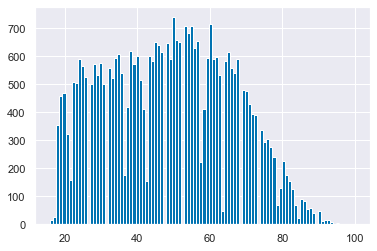

In [64]:
#     E1016        >>>         DATE 1ST ROUND ELECTION BEGAN - MONTH
#     E1017        >>>         DATE 1ST ROUND ELECTION BEGAN - DAY
#     E1018        >>>         DATE 1ST ROUND ELECTION BEGAN - YEAR

# figure out election date

election_date = pd.to_datetime(CSES_5["E1018"].astype(str)+"\\"+CSES_5["E1016"].apply(lambda x: x[0:2]).astype(str)+"\\"+CSES_5["E1017"].astype(str),
               format = "%Y\\%M\\%d")

age_at_election = (election_date - birth_date).dt.days/365.25
age_at_election.hist(bins=100)
age_at_election = age_at_election.apply(lambda x: np.floor(x))


missing_value_rows = CSES_5["E2001_Y"].apply(lambda x: x in missing_dict.keys())
age_at_election[missing_value_rows] = CSES_5["E2001_Y"][missing_value_rows]

# age in years
CSES_int_5["IMD2001_1"] = age_at_election

# age in categories
age_at_election[~missing_value_rows.astype('bool')] = pd.cut(age_at_election[~missing_value_rows.astype('bool')],
       bins = [0,24,34,44,54,64,200],
       labels = CSES_int["IMD2001_2"].cat.categories[0:6])

CSES_int_5["IMD2001_2"] = age_at_election

In [65]:
int_to_mod5 = Int_variable_df_fi[Int_variable_df_fi["var_descr_E"].notnull()].set_index("Unnamed: 0")["var_descr_E"]

In [66]:
# CSES_int[int_to_mod5.index].dtypes.value_counts()

In [67]:
# np.unique([x.name for x in CSES_int[int_to_mod5.index].dtypes.value_counts().index])

In [68]:
CSES_int[int_to_mod5.index].select_dtypes('float64')

,IMD1010_1,IMD1010_2,IMD1010_3
0,1.0,1.0000,1.0
1,1.0,1.0000,1.0
2,1.0,1.0000,1.0
3,1.0,1.0000,1.0
4,1.0,1.0000,1.0
...,...,...,...
281078,1.0,0.8473,1.0
281079,1.0,1.0853,1.0
281080,1.0,0.5586,1.0
281081,1.0,0.9397,1.0


In [69]:
CSES_5[int_to_mod5.values].select_dtypes('float64')

,E1012_1,E1012_2,E1012_3
0,1.0000,1.0000,1.0
1,1.0000,1.0000,1.0
2,1.0000,1.0000,1.0
3,1.0000,1.0000,1.0
4,1.0000,1.0000,1.0
...,...,...,...
35160,1.1308,1.1308,1.0
35161,0.8032,0.8032,1.0
35162,1.4443,1.4443,1.0
35163,3.7257,3.7257,1.0


In [70]:
CSES_int[int_to_mod5.index].select_dtypes('int16')

,IMD1008_YEAR
0,2005
1,2005
2,2005
3,2005
4,2005
...,...
281078,2014
281079,2014
281080,2014
281081,2014


In [71]:
CSES_5[int_to_mod5.values].select_dtypes('int16')

,E1008
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
35160,2016
35161,2016
35162,2016
35163,2016


In [72]:
CSES_int[int_to_mod5.index].select_dtypes('object')

,IMD1001,IMD1002_VER,IMD1002_DOI,IMD1004,IMD1005,IMD1006,IMD1006_UN,IMD1006_NAM,IMD1008_RES
0,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001111,0080,008,Albania,0000001111
1,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001112,0080,008,Albania,0000001112
2,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001113,0080,008,Albania,0000001113
3,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001114,0080,008,Albania,0000001114
4,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001115,0080,008,Albania,0000001115
...,...,...,...,...,...,...,...,...,...
281078,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001296,7100,710,South Africa,0000001296
281079,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001297,7100,710,South Africa,0000001297
281080,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001298,7100,710,South Africa,0000001298
281081,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001299,7100,710,South Africa,0000001299


In [73]:
CSES_5[int_to_mod5.values].select_dtypes('object')

,E1001,E1002_VER,E1002_DOI,E1004,E1005,E1006,E1006_UN,E1006_NAM,E1009
0,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,AUS_2019,036020190000000001,0360,036,Australia,0000000001
1,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,AUS_2019,036020190000000003,0360,036,Australia,0000000003
2,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,AUS_2019,036020190000000004,0360,036,Australia,0000000004
3,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,AUS_2019,036020190000000005,0360,036,Australia,0000000005
4,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,AUS_2019,036020190000000006,0360,036,Australia,0000000006
...,...,...,...,...,...,...,...,...,...
35160,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,USA_2016,840020160000005085,8400,840,United States of America,0000005085
35161,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,USA_2016,840020160000005086,8400,840,United States of America,0000005086
35162,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,USA_2016,840020160000005087,8400,840,United States of America,0000005087
35163,CSES-MODULE-5,VER2020-MAY-14,doi:10.7804/cses.module5.2020-05-14,USA_2016,840020160000005088,8400,840,United States of America,0000005088


In [74]:
## okay - by inspection
# float64, int16, object dtypes 
for int_var in CSES_int[int_to_mod5.index].select_dtypes('float64').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

for int_var in CSES_int[int_to_mod5.index].select_dtypes('int16').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]
    
for int_var in CSES_int[int_to_mod5.index].select_dtypes('object').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [75]:
CSES_5[int_to_mod5.loc["IMD5056_1"]]

0        99999. MISSING
1        99999. MISSING
2        99999. MISSING
3        99999. MISSING
4        99999. MISSING
              ...      
35160              1.28
35161              1.28
35162              1.28
35163              1.28
35164              1.28
Name: E5095_1, Length: 35165, dtype: category
Categories (19, object): [-1.02 < -0.06 < 0.02 < 0.46 ... 4.65 < 5.1 < 16.44 < 99999. MISSING]

In [76]:
int_cats = CSES_int[int_to_mod5.index].select_dtypes('category').apply(lambda x: "|".join([str(x) for x in x.cat.categories]))

In [77]:
mod5_cats = CSES_5[int_to_mod5.values].select_dtypes('category').apply(lambda x: "|".join([str(x) for x in x.cat.categories]))

In [78]:
matched_cats = CSES_int[int_to_mod5.index].select_dtypes('category').columns[(int_cats.values == mod5_cats.values)]
matched_cats

Index(['IMD2006', 'IMD2007', 'IMD3005_4', 'IMD3006', 'IMD3007_A', 'IMD3007_B',
       'IMD3007_C', 'IMD3007_D', 'IMD3007_E', 'IMD3007_F', 'IMD3007_G',
       'IMD3007_H', 'IMD3007_I', 'IMD3008_A', 'IMD3008_B', 'IMD3008_C',
       'IMD3008_D', 'IMD3008_E', 'IMD3008_F', 'IMD3008_G', 'IMD3008_H',
       'IMD3008_I', 'IMD3009_A', 'IMD3009_B', 'IMD3009_C', 'IMD3009_D',
       'IMD3009_E', 'IMD3009_F', 'IMD3009_G', 'IMD3009_H', 'IMD3009_I',
       'IMD3011', 'IMD3012', 'IMD5007', 'IMD5013', 'IMD5016_4', 'IMD5017_4',
       'IMD5018_2', 'IMD5018_4', 'IMD5031_I'],
      dtype='object')

In [79]:
for int_var in matched_cats:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [80]:
unmatched_cats = CSES_int[int_to_mod5.index].select_dtypes('category').columns[(int_cats.values != mod5_cats.values)]
unmatched_cats

Index(['IMD1003', 'IMD1007', 'IMD1009', 'IMD1011_M', 'IMD1011_D', 'IMD1011_Y',
       'IMD1012_M', 'IMD1012_D', 'IMD1012_Y', 'IMD1013_M',
       ...
       'IMD5056_1', 'IMD5056_2', 'IMD5056_3', 'IMD5057_1', 'IMD5057_2',
       'IMD5057_3', 'IMD5058_1', 'IMD5058_2', 'IMD5059_1', 'IMD5059_2'],
      dtype='object', length=202)

In [81]:
int_modes = CSES_int[unmatched_cats].describe(include='all').loc["top"]

In [82]:
mod5_modes = CSES_5[int_to_mod5.loc[unmatched_cats]].describe(include='all').loc["top"]

In [83]:
(int_modes.values==mod5_modes.values).sum(),(int_modes.values!=mod5_modes.values).sum(),

(79, 123)

In [84]:
int_cats_alpha = int_cats[unmatched_cats].apply(lambda x: "|".join( [cat for cat in x.split("|") if np.isnan(pd.to_numeric(cat,errors='coerce'))]))
int_cats_num = int_cats[unmatched_cats].apply(lambda x: [float(cat) for cat in x.split("|") if not np.isnan(pd.to_numeric(cat,errors='coerce'))]).apply(lambda x: (np.max(x),np.min(x)) if x!=[] else np.nan)
int_cats_num

IMD1003                          NaN
IMD1007                          NaN
IMD1009                          NaN
IMD1011_M                        NaN
IMD1011_D                (31.0, 1.0)
                      ...           
IMD5057_3    (309326304.0, 271128.0)
IMD5058_1               (14.1, 1.32)
IMD5058_2             (150.96, 2.15)
IMD5059_1              (13.33, 1.16)
IMD5059_2             (121.76, 1.75)
Length: 202, dtype: object

In [85]:
mod_cats_alpha = mod5_cats[int_to_mod5.loc[unmatched_cats]].apply(lambda x: "|".join([cat for cat in x.split("|") if np.isnan(pd.to_numeric(cat,errors='coerce'))]))
mod_cats_num = mod5_cats[int_to_mod5.loc[unmatched_cats]].apply(lambda x: [float(cat) for cat in x.split("|") if not np.isnan(pd.to_numeric(cat,errors='coerce'))]).apply(lambda x: (np.max(x),np.min(x)) if x!=[] else np.nan)
mod_cats_num

var_descr_E
E1003                          NaN
E1007                          NaN
E1015                          NaN
E1016                          NaN
E1017                  (29.0, 4.0)
                    ...           
E5098_3    (318622528.0, 327386.0)
E5078                (18.02, 2.82)
E5079                (18.02, 2.82)
E5080                (16.54, 2.09)
E5081                (16.54, 2.09)
Length: 202, dtype: object

In [86]:
int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values]

IMD1003      00802005. ALBANIA (2005)|03202015. ARGENTINA (...
IMD1007      001. [SEE ELECTION STUDY NOTES]|002. [SEE ELEC...
IMD1009      10. PARLIAMENTARY/LEGISLATIVE|12. PARLIAMENTAR...
IMD1011_M    01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
IMD1012_M    01. JANUARY|03. MARCH|04. APRIL|05. MAY|06. JU...
                                   ...                        
IMD5057_2    999999999. MISSING AND/OR NOT AVAILABLE AT TIM...
IMD5058_1    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5058_2    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5059_1    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5059_2    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
Length: 129, dtype: object

In [87]:
mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values]

var_descr_E
E1003      03602019. AUSTRALIA (2019)|04002017. AUSTRIA (...
E1007      001. [SEE ELECTION STUDY NOTES]|002. [SEE ELEC...
E1015      10. PARLIAMENTARY/LEGISLATIVE|12. PARLIAMENTAR...
E1016      01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
E1019      05. MAY|10. OCTOBER|12. DECEMBER|96. NOT APPLI...
                                 ...                        
E5098_2                                                     
E5078      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5079      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5080      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5081      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
Length: 129, dtype: object

In [88]:
mod5_int_category_discrepancies = pd.DataFrame()
mod5_int_category_discrepancies["int_var"] = int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values].index
mod5_int_category_discrepancies["int_cat"] = int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values].values
mod5_int_category_discrepancies["mod_var"] = mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values].index
mod5_int_category_discrepancies["mod_cat"] = mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values].values


In [89]:
mod5_int_category_discrepancies.to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"mod5_int_category_discrepancies.csv")

In [90]:
# int_to_mod5.shape,unmatched_cats.shape

In [91]:
# len(matched_cats)
# int_cats_num

In [92]:
# (set(int_to_mod5.index) - set(unmatched_cats)) - set(matched_cats)

# discrepancy between matched and unmatched cats == 'float64','int16','object' columns

In [93]:
# CSES_5["E1016"].value_counts()
# really, no december
# 21 studies ... pretty realistic

In [94]:
# CSES_5["E1019"].value_counts()
CSES_int_5["IMD1016_1"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
35160    NaN
35161    NaN
35162    NaN
35163    NaN
35164    NaN
Name: IMD1016_1, Length: 35165, dtype: category
Categories (5, object): [1. FACE-TO-FACE < 2. TELEPHONE < 3. MAIL OR SELF-COMPLETED SUPPLEMENT < 4. INTERNET < 9. MISSING]

In [95]:
# IMD1015 and E1023 - same variable name, but different contents
# -> one is about study timing, the other about study context
# updated in csv

int_to_mod5.drop("IMD1015",errors='ignore',inplace=True)

In [96]:
def replace_categories(ser, replace_dict, int_ser):
    return ser.replace(replace_dict).astype('category').cat.set_categories(int_ser.cat.categories,
                                                                                    ordered = int_ser.cat.ordered)

In [97]:
#{IMD1016_1, E1024_1}
# need to be harmonized!
# 1. FACE-TO-FACE|2. TELEPHONE|3. MAIL OR SELF-COMPLETED SUPPLEMENT|4. INTERNET|9. MISSING
# 1. IN PERSON, FACE-TO-FACE - USING A QUESTIONNAIRE ON PAPER|2. IN PERSON, FACE-TO-FACE - USING AN ELECTRONIC/COMPUTERIZED QUESTIONNAIRE|3. TELEPHONE|4. MAIL OR SELF-COMPLETION SUPPLEMENT|5. INTERNET

# IMD1016_2	3. MAIL OR SELF-COMPLETED SUPPLEMENT|9. MISSING	E1024_2	0. NOT APPLICABLE|3. TELEPHONE|5. INTERNET
# IMD1016_3	9. MISSING	E1024_3	0. NOT APPLICABLE

# CSES_5["E1024_1"].value_counts()

replace_dict = {"0. NOT APPLICABLE":"9. MISSING",
    "1. IN PERSON, FACE-TO-FACE - USING A QUESTIONNAIRE ON PAPER":"1. FACE-TO-FACE",
 "2. IN PERSON, FACE-TO-FACE - USING AN ELECTRONIC/COMPUTERIZED QUESTIONNAIRE":"1. FACE-TO-FACE",
 "3. TELEPHONE":"2. TELEPHONE",
 "4. MAIL OR SELF-COMPLETION SUPPLEMENT":"3. MAIL OR SELF-COMPLETED SUPPLEMENT",
 "5. INTERNET":"4. INTERNET",}




# temp = CSES_5["E1024_1"].replace(replace_dict).astype('category').cat.set_categories(CSES_int["IMD1016_1"].cat.categories,
#                                                                                     ordered = CSES_int["IMD1016_1"].cat.ordered)

# CSES_int["IMD1016_1"].append(temp)

# CSES_int_5["IMD1016_1"]

CSES_int_5["IMD1016_1"] = replace_categories(CSES_5["E1024_1"], replace_dict, CSES_int["IMD1016_1"])
CSES_int_5["IMD1016_2"] = replace_categories(CSES_5["E1024_2"], replace_dict, CSES_int["IMD1016_1"])
CSES_int_5["IMD1016_3"] = replace_categories(CSES_5["E1024_3"], replace_dict, CSES_int["IMD1016_1"])

In [98]:
# gender: trivial harmonising
# IMD2002	1. MALE|2. FEMALE|3. [SEE ELECTION STUDY NOTES]|7. REFUSED|9. MISSING	E2002	1. MALE|2. FEMALE|3. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|9. MISSING

rename_dict = {"7. VOLUNTEERED: REFUSED":"7. REFUSED"}
CSES_int_5["IMD2002"] = CSES_5["E2002"].cat.rename_categories(rename_dict)

In [99]:
# education: non-trivial harmonising
# IMD2003	0. NONE (NO EDUCATION) / ILLITERATE|1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION|2. HIGHER SECONDARY EDUCATION|3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION|4. UNIVERSITY EDUCATION|6. OTHER|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E2003	01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION|02. ISCED LEVEL 1 - PRIMARY|03. ISCED LEVEL 2 - LOWER SECONDARY|04. ISCED LEVEL 3 - UPPER SECONDARY|05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY|06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY|07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT|08. ISCED LEVEL 7 - MASTER OR EQUIVALENT|09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT|96. NONE (NO EDUCATION)|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING

# Mod 5
#  01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION
#  02. ISCED LEVEL 1 - PRIMARY
#  03. ISCED LEVEL 2 - LOWER SECONDARY
#  04. ISCED LEVEL 3 - UPPER SECONDARY
#  05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY
#  06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY
#  07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT
#  08. ISCED LEVEL 7 - MASTER OR EQUIVALENT
#  09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT

#  96. NONE (NO EDUCATION)

#  97. VOLUNTEERED: REFUSED
#  98. VOLUNTEERED: DON'T KNOW

#  99. MISSING

# IMD 

#  0. NONE (NO EDUCATION)/ILLITERATE
#  1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION
#  2. HIGHER SECONDARY EDUCATION
#  3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION 
#  4. UNIVERSITY EDUCATION
#  6. OTHER [SEE Standalone CSES MODULE CODEBOOK]

#  7. VOLUNTEERED: REFUSED
#  8. VOLUNTEERED: DON'T KNOW

#  9. MISSING

#  |      +++ TABLE: MAPPING OF EDUCATION CODES IN CSES MODULE 4
#  |                  TO EDUCATION CODES IN CSES IMD
#  | 
#  | IMD CODE   CSES MODULE 4 CLASSIFICATION (CSES MODULE 4 CODE)
#  |-----------------------------------------------------------------
#  |        0.  None/ISCED Level 0 - Early Childhood Education (0/96)
#  |        1.  ISCED Level 1 - Primary & ISCED Level 2 Lower
#  |            Secondary (2/3)
#  |        2.  ISCED Level 3 - Upper Secondary
#  |        3.  ISCED Level 4 - Post-Secondary Non-Tertiary
#  |            ISCED Level 5 - Short-Cycle Tertiary
#  |        4.  ISCED Level 6 - Bachelor or equivalent
#  |            ISCED Level 7 - Master or equivalent
#  |            ISCED Level 8 - Doctoral or equivalent


replace_dict = {      '01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION':'0. NONE (NO EDUCATION) / ILLITERATE',
       '02. ISCED LEVEL 1 - PRIMARY':'1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION',
       '03. ISCED LEVEL 2 - LOWER SECONDARY':'1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION',
       '04. ISCED LEVEL 3 - UPPER SECONDARY':'2. HIGHER SECONDARY EDUCATION',
       '05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY':'3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION',
       '06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY':'3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION',
       '07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '08. ISCED LEVEL 7 - MASTER OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '96. NONE (NO EDUCATION)':'0. NONE (NO EDUCATION) / ILLITERATE',
       '97. VOLUNTEERED: REFUSED':'7. VOLUNTEERED: REFUSED',
       "98. VOLUNTEERED: DON'T KNOW":"8. VOLUNTEERED: DON'T KNOW",
       '99. MISSING':'9. MISSING'}


CSES_int_5["IMD2003"] = replace_categories(CSES_5["E2003"], replace_dict, CSES_int["IMD2003"])


In [100]:
# marital: trivial harmonising
# IMD2004	1. MARRIED OR LIVING TOGETHER AS MARRIED|2. WIDOWED|3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATED/NOT LIVING WITH LEGAL SPOUSE)|4. SINGLE, NEVER MARRIED|5. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E2004	1. MARRIED OR LIVING TOGETHER AS MARRIED|2. WIDOWED|3. DIVORCED OR SEPARATED|4. SINGLE, NEVER MARRIED|5. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. MARRIED OR LIVING TOGETHER AS MARRIED': '1. MARRIED OR LIVING TOGETHER AS MARRIED',
 '2. WIDOWED': '2. WIDOWED',
 '3. DIVORCED OR SEPARATED': '3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATED/NOT LIVING WITH LEGAL SPOUSE)',
 '4. SINGLE, NEVER MARRIED': '4. SINGLE, NEVER MARRIED',
 '5. [SEE ELECTION STUDY NOTES]': '5. [SEE ELECTION STUDY NOTES]',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD2004"] = CSES_5["E2004"].cat.rename_categories(rename_dict)

In [101]:
# religion: non-trivial harmonising
# IMD2005	1. CATHOLIC|2. PROTESTANT|3. ORTHODOX/EASTERN CATHOLIC CHURCHES|4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)|5. JEWISH|6. ISLAM - SUNNI|7. ISLAM - OTHER|8. BUDDHISM|9. HINDUISM|10. INDIGENOUS|11. ETHNORELIGIONS|12. NON-BELIEVERS|13. AGNOSTICS|96. OTHER: NOT SPECIFIED|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING	E2013	1000. CHRISTIAN (NO DENOMINATION GIVEN)|1101. ROMAN CATHOLIC|1199. CATHOLIC, OTHER [SEE ELECTION STUDY VARIABLE NOTES]|1200. PROTESTANT, NO DENOMINATION GIVEN|1201. ADVENTIST|1203. BAPTIST|1205. EUROPEAN FREE CHURCH (ANABAPTISTS, MENNONITES)|1206. HOLINESS|1208. LUTHERAN|1209. METHODIST|1210. PENTECOSTAL|1211. PRESBYTERIAN|1213. SALVATION ARMY/SALVATIONIST|1214. CHRISTIAN BRETHEN|1215. CHURCHES OF CHRIST|1216. REFORMED CHURCHES|1298. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]|1299. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]|1300. EPISCOPALIAN, ANGLICAN, CHURCH OF ENGLAND, CHURCH OF IRELAND|1499. INDEPENDENT, OTHER [SEE ELECTION STUDY NOTES]|1501. CHRISTIAN SCIENTISTS|1502. MORMONS, CHURCH OF LATTER DAY SAINTS|1503. UNITARIAN UNIVERSALISTS|1504. JEHOVAH'S WITNESSES|1600. EASTERN ORTHODOX|1699. ORTHODOX, OTHER [SEE ELECTION STUDY NOTES]|2000. JEWISH|3000. MUSLIM; MOHAMMEDAN; ISLAM (NO DENOMINATION GIVEN)|4000. BUDDHIST|5000. HINDU|5600. SIKHISM|6100. CONFUCIANISM|6200. TAOISM|7100. PAGAN, HEATHEN, TRIBAL RELIGIONSIST, TRADITIONAL RELIGIONIST, ANIMISM, SHAMANISM|7110. RATANA, MAORI|7200. SPIRITISM|7500. BAHAI|7900. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]|7901. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]|8100. AGNOSTIC|8200. ATHEIST|8300. NONE|9001. [SEE ELECTION STUDY NOTES]|9002. [SEE ELECTION STUDY NOTES]|9003. [SEE ELECTION STUDY NOTES]|9004. [SEE ELECTION STUDY NOTES]|9005. [SEE ELECTION STUDY NOTES]|9600. OTHER: NOT SPECIFIED|9997. VOLUNTEERED: REFUSED|9998. VOLUNTEERED: DON'T KNOW|9999. MISSING
# dict(zip(CSES_5["E2013"].cat.categories,CSES_5["E2013"].cat.categories))


#  |        01. Roman Catholic (1/1101)
#  |            Catholic, Other [see Election Study Notes] (1199)
#  |        02. Protestant, no Denomination Given (2/1200)
#  |            Adventist (3/1201)
#  |            Episcopalian, Anglican, Church of England, 
#  |            Church of Ireland (4/1300)
#  |            Baptist (5/1203)
#  |            Congregational (6/1204)
#  |            European Free Church (Anabaptists) (7/1205)
#  |            Holiness (8/1206)
#  |            Independent-Fundamentalist (9/1401)
#  |            Lutheran (10/1208)
#  |            Methodist (11/1209)
#  |            Pentecostal (12/1210)
#  |            Presbyterian (13/1211)
#  |            Christian Scientists (14/1501)
#  |            Unitarian; Universalist (16/1503)
#  |            Reformed Calvinist (not Presb) / Calvinist (91/1212)
#  |            Salvation Army/Salvationist (1213)
#  |            Christian Brethren (1214)
#  |            Churches of Christ (1215)
#  |            Reformed Churches (1216)
#  |            Protestant Church of The Netherlands (1217)
#  |            Protestant, Other [see Election Study Notes] 
#  |            (1298/1299)               
#  |        03. Eastern Orthodox (Greek Rite Catholic) (17/1600)
#  |            Eastern Catholic Churches (e.g., Eastern Rite
#  |            Catholic, Greek Rite Cathole, Uniate) (19/1102)
#  |            Orthodox, Other [see Election Study Notes] (1699)
#  |        04. Christian (no Denomination Given) (18/1000)
#  |            Mormons; Latter Day Saints (15/1502)
#  |            Apostolic (1410)
#  |            United Churches (1420)
#  |            Independent, Other [see Election Study Notes] (1499)
#  |            Jehovah's Witnesses (1504)
#  |            Non-traditional Protestant, Other [see Election 
#  |            Study Notes] (1599)
#  |        05. Jewish (20/2000)
#  |        06. Sunni (33/3100)
#  |        07. Muslim; Mohammedan; Islam (no Denomination Given) 
#  |            (30/3000)
#  |            Kharijism (31)
#  |            Mu'tazilism (32)
#  |            Shi'ism (34/3200)
#  |            Isma'ilis (35/3210)
#  |            Baha'i (36/22)
#  |            Druse (37/3211)
#  |        08. Buddhist (40/4000)
#  |            Theravada (41/4100)
#  |            Mahayana (42/4200)
#  |            Tantrism (43)
#  |            Tibetan Buddhism (44)
#  |            Shingon (45)
#  |        09. Hindu (50/5000)
#  |            Jainism (51/5500)
#  |            Sikhism (52/5600)
#  |            Parsiism (53/5010)
#  |            Vedism (54)
#  |            Brahmanism (55)
#  |            Vaishnavism (56/5020)
#  |            Shaivism (57/5030)
#  |            Tantrism (58)
#  |            Shaktism (59/5040)
#  |            Folk Hinduism (60)
#  |        10. Confucianism (71/6100)
#  |            Taoism (72/6200)
#  |            Shinto (73/6300)
#  |            Bahai (74)
#  |            I-Kuan-Tao (75/6401)
#  |            New Religionists (6400)
#  |            Traditional Folk Belief/Nichiren Shoshu (6500)
#  |        11. Pagan, Heathen, Tribal Religionist, Traditional 
#  |            Religionist, Animism, Shamanism (7100)
#  |            Ratana, Maori (7110)
#  |            Spiritism (7200)
#  |            Bahai (7500)
#  |            Ehtnoreligionist, Other [see Election Study Notes] 
#  |            (7900/7901)
#  |        12. Atheists (82/92/8200)
#  |            None (83/93/8300)
#  |        13. Agnostics (81/91/8100)
#  |        96. Other Religions (80)
#  |            Other: Not Specified (9600)
#  |        97. Refused (97/9997)
#  |        98. Don't Know (98/9998)
#  |        99. Missing (99/9999)

# ['1. CATHOLIC',
#  '2. PROTESTANT',
#  '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
#  '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
#  '5. JEWISH',
#  '6. ISLAM - SUNNI',
#  '7. ISLAM - OTHER',
#  '8. BUDDHISM',
#  '9. HINDUISM',
#  '10. INDIGENOUS',
#  '11. ETHNORELIGIONS',
#  '12. NON-BELIEVERS',
#  '13. AGNOSTICS',
#  '96. OTHER: NOT SPECIFIED',
#  '97. VOLUNTEERED: REFUSED',
#  "98. VOLUNTEERED: DON'T KNOW",
#  '99. MISSING']


# no sunni category???
replace_dict = {'1000. CHRISTIAN (NO DENOMINATION GIVEN)': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1101. ROMAN CATHOLIC': '1. CATHOLIC',
 '1199. CATHOLIC, OTHER [SEE ELECTION STUDY VARIABLE NOTES]': '1. CATHOLIC',
 '1200. PROTESTANT, NO DENOMINATION GIVEN': '2. PROTESTANT',
 '1201. ADVENTIST': '2. PROTESTANT',
 '1203. BAPTIST': '2. PROTESTANT',
 '1205. EUROPEAN FREE CHURCH (ANABAPTISTS, MENNONITES)':'2. PROTESTANT',
 '1206. HOLINESS': '2. PROTESTANT',
 '1208. LUTHERAN': '2. PROTESTANT',
 '1209. METHODIST': '2. PROTESTANT',
 '1210. PENTECOSTAL': '2. PROTESTANT',
 '1211. PRESBYTERIAN': '2. PROTESTANT',
 '1213. SALVATION ARMY/SALVATIONIST': '2. PROTESTANT',
 '1214. CHRISTIAN BRETHEN':'2. PROTESTANT',
 '1215. CHURCHES OF CHRIST': '2. PROTESTANT',
 '1216. REFORMED CHURCHES': '2. PROTESTANT',
 '1298. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]': '2. PROTESTANT',
 '1299. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]': '2. PROTESTANT',
 '1300. EPISCOPALIAN, ANGLICAN, CHURCH OF ENGLAND, CHURCH OF IRELAND': '2. PROTESTANT',
 '1499. INDEPENDENT, OTHER [SEE ELECTION STUDY NOTES]': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1501. CHRISTIAN SCIENTISTS': '2. PROTESTANT',
 '1502. MORMONS, CHURCH OF LATTER DAY SAINTS': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1503. UNITARIAN UNIVERSALISTS': '2. PROTESTANT',
 "1504. JEHOVAH'S WITNESSES": '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1600. EASTERN ORTHODOX': '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
 '1699. ORTHODOX, OTHER [SEE ELECTION STUDY NOTES]': '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
 '2000. JEWISH': '5. JEWISH',
 '3000. MUSLIM; MOHAMMEDAN; ISLAM (NO DENOMINATION GIVEN)': '7. ISLAM - OTHER',
 '4000. BUDDHIST': '8. BUDDHISM',
 '5000. HINDU': '9. HINDUISM',
 '5600. SIKHISM': '9. HINDUISM',
 '6100. CONFUCIANISM': '10. INDIGENOUS',
 '6200. TAOISM': '10. INDIGENOUS',
 '7100. PAGAN, HEATHEN, TRIBAL RELIGIONSIST, TRADITIONAL RELIGIONIST, ANIMISM, SHAMANISM': '11. ETHNORELIGIONS',
 '7110. RATANA, MAORI': '11. ETHNORELIGIONS',
 '7200. SPIRITISM': '11. ETHNORELIGIONS',
 '7500. BAHAI': '10. INDIGENOUS',
 '7900. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]': '11. ETHNORELIGIONS',
 '7901. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]': '11. ETHNORELIGIONS',
 '8100. AGNOSTIC': '13. AGNOSTICS',
 '8200. ATHEIST': '12. NON-BELIEVERS',
 '8300. NONE': '12. NON-BELIEVERS',
 '9001. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9002. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9003. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9004. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9005. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9600. OTHER: NOT SPECIFIED': '96. OTHER: NOT SPECIFIED',
 '9997. VOLUNTEERED: REFUSED': '97. VOLUNTEERED: REFUSED',
 "9998. VOLUNTEERED: DON'T KNOW": "98. VOLUNTEERED: DON'T KNOW",
 '9999. MISSING':'99. MISSING'}

CSES_int_5["IMD2005"] = replace_categories(CSES_5["E2013"], replace_dict, CSES_int["IMD2005"])

In [102]:
# turnout: trivial harmonising
# IMD3001_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_PR_1	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
# IMD3001_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_PR_2	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW
# IMD3001_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_LH	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|96. NOT APPLICABLE: NO LOWER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
# IMD3001_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: UNICAMERAL SYSTEM|9999996. NOT APPLICABLE: NO UPPER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_UH	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: UNICAMERAL SYSTEM|96. NOT APPLICABLE: NO UPPER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING

rename_dict = dict(zip(CSES_5["E3012_PR_1"].cat.categories,CSES_int["IMD3001_PR_1"].cat.categories))
CSES_int_5["IMD3001_PR_1"] = CSES_5["E3012_PR_1"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_PR_2"].cat.categories,CSES_int["IMD3001_PR_2"].cat.categories))
CSES_int_5["IMD3001_PR_2"] = CSES_5["E3012_PR_2"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_LH"].cat.categories,CSES_int["IMD3001_LH"].cat.categories))
CSES_int_5["IMD3001_LH"] = CSES_5["E3012_LH"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_UH"].cat.categories,CSES_int["IMD3001_UH"].cat.categories))
CSES_int_5["IMD3001_UH"] = CSES_5["E3012_UH"].cat.rename_categories(rename_dict)


In [103]:
# past turnout: trivial harmonising
# IMD3002_OUTGOV	0. DID NOT VOTE FOR THE OUTGOING GOVERNMENT (INCUMBENT)|1. VOTED FOR THE OUTGOING GOVERNMENT (INCUMBENT)|9999996. NOT ASCERTAINED/INCUMBENT CANDIDATE/PARTY DID NOT CONTEST|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING / ABSTAINED (DID NOT VOTE)	E3013_OUTGOV	0. DID NOT VOTE FOR THE OUTGOING GOVERNMENT (INCUMBENT)|1. VOTED FOR THE OUTGOING GOVERNMENT (INCUMBENT)|999996. NOT ASCERTAINED / INCUMBENT CANDIDATE/PARTY DID NOT CONTEST|999997. VOLUNTEERED: REFUSED|999998. VOLUNTEERED: DON'T KNOW|999999. MISSING / ABSTAINED (DID NOT VOTE)
rename_dict = dict(zip(CSES_5["E3013_OUTGOV"].cat.categories,CSES_int["IMD3002_OUTGOV"].cat.categories))
CSES_int_5["IMD3002_OUTGOV"] = CSES_5["E3013_OUTGOV"].cat.rename_categories(rename_dict)
# IMD3003_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_PR_1"].cat.categories,CSES_int["IMD3003_PR_1"].cat.categories))
CSES_int_5["IMD3003_PR_1"] = CSES_5["E3014_PR_1"].cat.rename_categories(rename_dict)
# IMD3003_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_PR_2"].cat.categories,CSES_int["IMD3003_PR_2"].cat.categories))
CSES_int_5["IMD3003_PR_2"] = CSES_5["E3014_PR_2"].cat.rename_categories(rename_dict)

# last two miss 'not applicable' category because doesn't all cases have a lower house election in module 5 dataset
# IMD3003_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_LH"].cat.categories,CSES_int["IMD3003_LH"].cat.remove_categories('9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION').cat.categories))
CSES_int_5["IMD3003_UH"] = replace_categories(CSES_5["E3014_LH"], rename_dict, CSES_int["IMD3003_LH"])
# IMD3003_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: UNICAMERAL SYSTEM|9999996. NOT APPLICABLE: NO UPPER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|95. NOT APPLICABLE: UNICAMERAL SYSTEM|96. NOT APPLICABLE: NO UPPER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_UH"].cat.categories,CSES_int["IMD3003_UH"].cat.remove_categories('9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]').cat.categories))
CSES_int_5["IMD3003_UH"] = replace_categories(CSES_5["E3014_UH"], rename_dict, CSES_int["IMD3003_UH"])

In [104]:
# PARTY IDENTIFICATION: ARE YOU CLOSE TO ANY POLITICAL : trivial harmonising
# IMD3005_1	1. YES|5. NO|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3024_1	0. NO|1. YES|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. YES': '1. YES',
 '0. NO': '5. NO',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3005_1"] = replace_categories(CSES_5["E3024_1"], rename_dict, CSES_int["IMD3005_1"])

# IMD3005_2	1. YES|5. NO|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3024_2	0. NO|1. YES|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. YES': '1. YES',
 '0. NO': '5. NO',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}
CSES_int_5["IMD3005_2"] = replace_categories(CSES_5["E3024_2"], rename_dict, CSES_int["IMD3005_2"])

# dict(zip(CSES_5["E3024_2"].cat.categories,CSES_int["IMD3005_2"].cat.categories))

In [105]:
# Some nontrivial harmonisation
# IMD3010	1. VERY SATISFIED|2. FAIRLY SATISFIED|4. NOT VERY SATISFIED|5. NOT AT ALL SATISFIED|6. NEITHER SATISFIED NOR DISSATISFIED|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3023	1. VERY SATISFIED|2. FAIRLY SATISFIED|4. NOT VERY SATISFIED|5. NOT AT ALL SATISFIED|6. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
rename_dict = dict(zip(CSES_5["E3023"].cat.categories,CSES_int["IMD3010"].cat.categories))
CSES_int_5["IMD3010"] = CSES_5["E3023"].cat.rename_categories(rename_dict)
# IMD3013_1	1. GOTTEN BETTER|3. STAYED THE SAME|5. GOTTEN WORSE|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3011	1. GOTTEN MUCH BETTER|2. GOTTEN SOMEWHAT BETTER|3. STAYED ABOUT THE SAME|4. GOTTEN SOMEWHAT WORSE|5. GOTTEN MUCH WORSE|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
replace_dict = {'1. GOTTEN MUCH BETTER':'1. GOTTEN BETTER',
 '2. GOTTEN SOMEWHAT BETTER':'1. GOTTEN BETTER',
 '3. STAYED ABOUT THE SAME':'3. STAYED THE SAME',
 '4. GOTTEN SOMEWHAT WORSE':'5. GOTTEN WORSE',
 '5. GOTTEN MUCH WORSE':'5. GOTTEN WORSE',
 '7. VOLUNTEERED: REFUSED':'7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW":"8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING':'9. MISSING'}

CSES_int_5["IMD3013_1"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_1"])

## We could actually use this to build those "how much better/how much worse" variables
# IMD3013_2 , E3011
replace_dict = {'1. GOTTEN MUCH BETTER': '1. MUCH BETTER',
 '2. GOTTEN SOMEWHAT BETTER': '2. SOMEWHAT BETTER',
 '3. STAYED ABOUT THE SAME': '9. MISSING',
 '4. GOTTEN SOMEWHAT WORSE': '9. MISSING',
 '5. GOTTEN MUCH WORSE': '9. MISSING',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3013_2"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_2"])

# IMD3013_3 , E3011
replace_dict = {'1. GOTTEN MUCH BETTER': '9. MISSING',
 '2. GOTTEN SOMEWHAT BETTER': '9. MISSING',
 '3. STAYED ABOUT THE SAME': '9. MISSING',
 '4. GOTTEN SOMEWHAT WORSE': '4. SOMEWHAT WORSE',
 '5. GOTTEN MUCH WORSE': '5. MUCH WORSE',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3013_3"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_3"])

# IMD3014	1. VERY GOOD JOB|2. GOOD JOB|3. BAD JOB|4. VERY BAD JOB|6. NEITHER GOOD NOR BAD|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3009	1. VERY GOOD JOB|2. GOOD JOB|3. BAD JOB|4. VERY BAD JOB|6. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
# CSES_int["IMD3014"].value_counts()

# 6. NEITHER GOOD NOR BAD not in the notes!
rename_dict = dict(zip(CSES_5["E3009"].cat.categories,CSES_int["IMD3014"].cat.categories))

CSES_int_5["IMD3014"] = replace_categories(CSES_5["E3009"], rename_dict, CSES_int["IMD3014"])

In [106]:
# IMD5002_C	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION|999. MISSING	E5002_C	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION
# IMD5002_D	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION|999. MISSING	E5002_D	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION
# IMD5004_C	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION|999. MISSING	E5004_C	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION
# IMD5004_D	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION|999. MISSING	E5004_D	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION
# IMD5005_A	996. NOT APPLICABLE: NO ROLE OF PRESIDENT|997. NOT APPLICABLE: NO PRESIDENTIAL ELECTION|999. MISSING	E5005_A	996. NOT APPLICABLE: NO ROLE OF PRESIDENT|997. NOT APPLICABLE: NO PRESIDENTIAL ELECTION

# all fine as they are, the mod 5 set just doesn't have any "missing" values
# note that these are mostly-numerical - so the cats just won't match

CSES_int_5["IMD5002_C"] = CSES_5["E5002_C"]
CSES_int_5["IMD5002_D"] = CSES_5["E5002_D"]
CSES_int_5["IMD5004_C"] = CSES_5["E5004_C"]
CSES_int_5["IMD5004_D"] = CSES_5["E5004_D"]
CSES_int_5["IMD5005_A"] = CSES_5["E5005_A"]

In [107]:
replace_dict = {'01. ECOLOGY PARTIES':'1. ECOLOGY PARTIES',
 '02. COMMUNIST PARTIES':'2. COMMUNIST PARTIES',   
 '03. SOCIALIST PARTIES':'3. SOCIALIST PARTIES',   
 '04. SOCIAL DEMOCRATIC PARTIES': '4. SOCIAL DEMOCRATIC PARTIES',
 '05. LEFT LIBERAL PARTIES': '5. LEFT LIBERAL PARTIES',
 '06. LIBERAL PARTIES': '6. LIBERAL PARTIES',
 '07. RIGHT LIBERAL PARTIES': '7. RIGHT LIBERAL PARTIES',
 '08. CHRISTIAN DEMOCRATIC PARTIES': '8. CHRISTIAN DEMOCRATIC PARTIES',
 '09. CONSERVATIVE PARTIES': '9. CONSERVATIVE PARTIES',
 '10. NATIONAL PARTIES': '10. NATIONAL PARTIES',
 '11. AGRARIAN PARTIES': '11. AGRARIAN PARTIES',
 '12. ETHNIC PARTIES': '12. ETHNIC PARTIES',
 '13. REGIONAL PARTIES': '13. REGIONAL PARTIES',
 '14. INDEPENDENT PARTIES': '14. INDEPENDENT PARTIES',
 '15. OTHER': '90. OTHER',
 '97. NOT APPLICABLE':'97. NOT APPLICABLE',
 '98. NO IDEOLOGICAL FAMILY MENTIONED': '98. NO IDEOLOGICAL FAMILY MENTIONED',
 '99. MISSING':'99. MISSING'}
# dict(zip(CSES_5["E5017_A"].cat.categories,CSES_int["IMD5011_A"].cat.categories))

## should do for all of these!

# IMD5011_A	2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|14. INDEPENDENT PARTIES|18. SOCIAL-LIBERAL|22. NATIONALIST LEFT|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_A	04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_A"] = replace_categories(CSES_5["E5017_A"], replace_dict, CSES_int["IMD5011_A"])
# IMD5011_B	2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_B	03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_B"] = replace_categories(CSES_5["E5017_B"], replace_dict, CSES_int["IMD5011_B"])
# IMD5011_C	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|25. COMMUNIST-GREEN|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_C	01. ECOLOGY PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_C"] = replace_categories(CSES_5["E5017_C"], replace_dict, CSES_int["IMD5011_C"])
# IMD5011_D	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|22. NATIONALIST LEFT|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_D	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_D"] = replace_categories(CSES_5["E5017_D"], replace_dict, CSES_int["IMD5011_D"])
# IMD5011_E	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|19. EXTREME LEFT|21. EXTREME NATIONALIST|23. EXTREME RIGHT|24. CENTRIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_E	02. COMMUNIST PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_E"] = replace_categories(CSES_5["E5017_E"], replace_dict, CSES_int["IMD5011_E"])
# IMD5011_F	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|18. SOCIAL-LIBERAL|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_F	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_F"] = replace_categories(CSES_5["E5017_F"], replace_dict, CSES_int["IMD5011_F"])
# IMD5011_G	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|17. SINGLE ISSUE PARTIES|90. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_G	01. ECOLOGY PARTIES|02. COMMUNIST PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_G"] = replace_categories(CSES_5["E5017_G"], replace_dict, CSES_int["IMD5011_G"])
# IMD5011_H	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|24. CENTRIST|26. ORTHODOX-CALVINIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_H	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_H"] = replace_categories(CSES_5["E5017_H"], replace_dict, CSES_int["IMD5011_H"])
# IMD5011_I	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|26. ORTHODOX-CALVINIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_I	04. SOCIAL DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_I"] = replace_categories(CSES_5["E5017_I"], replace_dict, CSES_int["IMD5011_I"])

# dict(zip(CSES_5["E5017_A"].cat.categories,CSES_int["IMD5011_A"].cat.categories))

In [108]:
## already the same!


# IMD5012_A	00. LEFT|97. NOT APPLICABLE|99. MISSING	E5018_A	10. RIGHT|99. MISSING
# IMD5012_B	00. LEFT|97. NOT APPLICABLE|99. MISSING	E5018_B	10. RIGHT|99. MISSING
# IMD5012_C	00. LEFT|10. RIGHT|99. MISSING	E5018_C	10. RIGHT|99. MISSING
# IMD5012_D	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_D	99. MISSING
# IMD5012_E	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_E	99. MISSING
# IMD5012_F	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_F	99. MISSING
# IMD5012_G	00. LEFT|10. RIGHT|99. MISSING	E5018_G	97. NOT APPLICABLE|99. MISSING
# IMD5012_H	10. RIGHT|99. MISSING	E5018_H	99. MISSING
# IMD5012_I	10. RIGHT|99. MISSING	E5018_I	99. MISSING
for party in ["A","B","C","D","E","F","G","H","I"]:
    CSES_int_5["IMD5012_"+party] = CSES_5["E5018_"+party]


In [109]:
# IMD5014	1. PLURALITY|2. ABSOLUTE MAJORITY RULE|3. QUALIFIED MAJORITY RULE|4. ELECTORAL COLLEGE|5. ALTERNATIVE VOTE|7. NOT APPLICABLE|9. MISSING	E5054	1. PLURALITY|2. ABSOLUTE MAJORITY RULE|4. ELECTORAL COLLEGE|5. SINGLE TRANSFERABLE VOTE|7. NOT APPLICABLE
rename_dict = {'5. SINGLE TRANSFERABLE VOTE':'5. ALTERNATIVE VOTE'}
CSES_int_5["IMD5014"] = CSES_5["E5054"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5014"].cat.categories)

In [110]:
# IMD5016_1	91. [SEE ELECTION STUDY NOTES]	E5040_1	91. 0THER [SEE ELECTION STUDY NOTES]
# IMD5016_2	91. [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE	E5040_2	91. 0THER [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE
# IMD5016_3	91. [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE	E5040_3	91. 0THER [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE

# for all three
rename_dict = {"91. 0THER [SEE ELECTION STUDY NOTES]":"91. [SEE ELECTION STUDY NOTES]"}
for party in ["1","2","3"]:
    CSES_int_5["IMD5016_"+party] = CSES_5["E5040_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5016_"+party].cat.categories)

In [111]:
# IMD5017_1	1. CANDIDATES|2. PARTY LISTS|4. [SEE ELECTION STUDY NOTES]	E5041_1	1. CANDIDATES|2. PARTY LISTS|4. OTHER [SEE ELECTION STUDY NOTES]
# IMD5017_2	1. CANDIDATES|2. PARTY LISTS|7. NOT APPLICABLE	E5041_2	2. PARTY LISTS|7. NOT APPLICABLE
# IMD5017_3	1. CANDIDATES|2. PARTY LISTS|4. [SEE ELECTION STUDY NOTES]|7. NOT APPLICABLE	E5041_3	1. CANDIDATES|2. PARTY LISTS|4. OTHER [SEE ELECTION STUDY NOTES]|7. NOT APPLICABLE

# for all three
rename_dict = {'4. OTHER [SEE ELECTION STUDY NOTES]': '4. [SEE ELECTION STUDY NOTES]'}

for party in ["1","2","3"]:
    CSES_int_5["IMD5017_"+party] = CSES_5["E5041_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5017_"+party].cat.categories)


In [112]:
# IMD5026_1	1. UNICAMERAL LEGISLATURE (ONE LEGISLATIVE CHAMBER)|2. BICAMERAL LEGISLATURE (TWO LEGISLATIVE CHAMBERS)	E5074	1. ONE LEGISLATIVE CHAMBER; UNICAMERAL LEGISLATURE|2. TWO LEGISLATIVE CHAMBERS; BICAMERAL LEGISLATURE
rename_dict = dict(zip(CSES_5["E5074"].cat.categories,CSES_int["IMD5026_1"].cat.categories))

CSES_int_5["IMD5026_1"] = CSES_5["E5074"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5026_1"].cat.categories)

In [113]:
rename_dict = {'99. MISSING':'99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5052_1	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_1	99. MISSING
# IMD5052_2	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_2	99. MISSING
# IMD5052_3	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_3	99. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5052_"+party] = CSES_5["E5093_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5052_"+party].cat.categories)

rename_dict = {'999999. MISSING':'999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5053_1	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_1	999999. MISSING
# IMD5053_2	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_2	
# IMD5053_3	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_3	999999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5053_"+party] = CSES_5["E5094_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5053_"+party].cat.categories)

rename_dict = {'999. MISSING':'999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5054_1	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_1	999. MISSING
# IMD5054_2	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_2	999. MISSING
# IMD5054_3	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_3	999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5054_"+party] = CSES_5["E5099_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5054_"+party].cat.categories)

# IMD5055_1	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_1	999. MISSING
# IMD5055_2	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_2	999. MISSING
# IMD5055_3	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_3	999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5055_"+party] = CSES_5["E5097_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5055_"+party].cat.categories)

rename_dict = {'99999. MISSING':'	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5056_1	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_1	99999. MISSING
# IMD5056_2	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_2	99999. MISSING
# IMD5056_3	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_3	99999. MISSING

for party in ["1","2","3"]:
    CSES_int_5["IMD5056_"+party] = CSES_5["E5095_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5056_"+party].cat.categories)

In [114]:
rename_dict = {'997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED':'997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED',
               '999. MISSING':'999.00. MISSING'}
# IMD5058_1	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5078	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5058_1"] = CSES_5["E5078"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5058_1"].cat.categories)
# IMD5058_2	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5079	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5058_2"] = CSES_5["E5079"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5058_2"].cat.categories)
# IMD5059_1	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5080	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5059_1"] = CSES_5["E5080"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5059_1"].cat.categories)
# IMD5059_2	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5081	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5059_2"] = CSES_5["E5081"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5059_2"].cat.categories)


In [115]:
pres_election_studies = [      '07602018. BRAZIL (2018)', '15202017. CHILE (2017)',
       '15802016. TAIWAN (2016)', '25002017. FRANCE (2017)',
       '79202018. TURKEY (2018)', '84002016. UNITED STATES (2016)']

pres_es_rows = CSES_5["E1003"].apply(lambda x: x in pres_election_studies)

categories_to_be_dropped = ['9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT',
 '9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS' ]

CSES_int_5["IMD3001"] = CSES_int_5["IMD3001_LH"].cat.remove_categories('9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION',)
CSES_int_5.loc[pres_es_rows,"IMD3001"] = CSES_int_5.loc[pres_es_rows,"IMD3001_PR_1"].cat.remove_categories(['9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT',
 '9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS', ])




In [116]:
## variables that *need* to be added

# age - already in the works DONE

## variables that *could* be added

# module no
# "main election" turnout DONE



In [117]:
### IMD variables with no obvious module 5 analogue

# Int_variable_df_fi[Int_variable_df_fi["var_descr_E"].isnull()].set_index("Unnamed: 0")["var_descr_E"]

## module no - trivial!

## age variables - has to be manually reconstructed

## IMD3001

#  The wording of this item, which is to record voting in the
#  national election, follows national standards.

#  This item ascertains whether or not the respondent cast a ballot
#  in the main election, regardless of whether or not it was valid.
#  In case of a single election taking place, e.g., a lower house
#  election only, then this variable reports the turnout decision for
#  that particular election. In cases where multiple elections took 
#  place, e.g., a presidential and a lower house election, this
#  variable reports the turnout decision in the main election. 
#  See variable notes for more information.

# superhelpful!

#  | VARIABLE VARIABLE NOTES: E3013_OUTGOV
#  |
#  | +++ TABLE: ELECTION STUDIES BY TYPE OF MAIN ELECTION
#  |
#  |                        Presidential  Lower House  Upper House  
#  | POLITY (ELEC YEAR)       Election     Election      Election  
#  | -------------------------------------------------------------
#  | AUSTRALIA (2019)             -            X            -
#  | AUSTRIA (2017)               -            X            -
#  | BRAZIL (2018)                X            -            -
#  | CHILE (2017)                 X            -            -
#  | FRANCE (2017)                X            -            -
#  | GERMANY (2016)               -            X            -
#  | GREECE (2015)                -            X            -
#  | HONG KONG (2016)             -            X*           -
#  | HUNGARY (2018)               -            X            -
#  | ICELAND (2016)               -            X            -
#  | ICELAND (2017)               -            X            -
#  | IRELAND (2016)               -            X            -
#  | ITALY (2018)                 -            X            -
#  | LITHUANIA (2016)             -            X            -
#  | MONTENEGRO (2016)            -            X            -
#  | NEW ZEALAND (2017)           -            X            -
#  | NORWAY (2017)                -            X            -     
#  | SOUTH KOREA (2016)           -            X            -
#  | TAIWAN (2016)                X            -            -
#  | TURKEY (2018)                X            -            -
#  | UNITED STATES (2016)         X            -            -

# I presume:
# IMD3001_PR_1    46337
# IMD3001_PR_2    17200 (but not this second round pres vote)
# IMD3001_LH      56224
# IMD3001_UH      30765

# IMD3002_UH_DC_3    NaN
# IMD3002_UH_DC_4    NaN
# IMD3004_UH_DC_3    NaN
## guess they didn't feel they needed to get all upper house theoretical extra vote options


# IMD3013_2          NaN
# IMD3013_3          NaN
## sad that they didn't get these "how much better/worse" options for mod 5 as well

# IMD3015_1          NaN
# IMD3015_2          NaN
# IMD3015_3          NaN
# IMD3015_4          NaN
# IMD3015_A          NaN
# IMD3015_B          NaN
# IMD3015_C          NaN
# IMD3015_D          NaN
# IMD5026_2          NaN
## very sad they didn't continue the series of dichotomized political information!



In [118]:
CSES_int_5["IMD1007"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
35160    NaN
35161    NaN
35162    NaN
35163    NaN
35164    NaN
Name: IMD1007, Length: 35165, dtype: category
Categories (7, object): [001. [SEE ELECTION STUDY NOTES] < 002. [SEE ELECTION STUDY NOTES] < 003. [SEE ELECTION STUDY NOTES] < 004. [SEE ELECTION STUDY NOTES] < 005. [SEE ELECTION STUDY NOTES] < 006. [SEE ELECTION STUDY NOTES] < 999. MISSING]

In [119]:
CSES_int_5["IMD1003"] = CSES_5["E1003"]
CSES_int_5["IMD1007"] = CSES_5["E1007"]

In [120]:
CSES_int_5["IMD1008_MOD_1"] = "00. NOT IN CSES MODULE 1"
CSES_int_5["IMD1008_MOD_1"] = CSES_int_5["IMD1008_MOD_1"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_1"].cat.categories)
CSES_int_5["IMD1008_MOD_2"] = "00. NOT IN CSES MODULE 2"
CSES_int_5["IMD1008_MOD_2"] = CSES_int_5["IMD1008_MOD_2"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_2"].cat.categories)
CSES_int_5["IMD1008_MOD_3"] = "00. NOT IN CSES MODULE 3"
CSES_int_5["IMD1008_MOD_3"] = CSES_int_5["IMD1008_MOD_3"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_3"].cat.categories)
CSES_int_5["IMD1008_MOD_4"] = "00. NOT IN CSES MODULE 4"
CSES_int_5["IMD1008_MOD_4"] = CSES_int_5["IMD1008_MOD_4"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_4"].cat.categories)
CSES_int_5["IMD1008_MOD_5"] = "01. IN CSES MODULE 5"
CSES_int_5["IMD1008_MOD_5"] = CSES_int_5["IMD1008_MOD_5"].astype('category').cat.set_categories(['00. NOT IN CSES MODULE 5', '01. IN CSES MODULE 5'])

In [121]:
CSES_int_5["IMD1009"] = CSES_5["E1015"].cat.set_categories(CSES_int["IMD1009"].cat.categories)

In [122]:
CSES_int_5["IMD1011_M"] = CSES_5["E1016"].cat.set_categories(CSES_int["IMD1011_M"].cat.categories)
CSES_int_5["IMD1011_D"] = CSES_5["E1017"].cat.set_categories(CSES_int["IMD1011_D"].cat.categories)
CSES_int_5["IMD1011_Y"] = CSES_5["E1018"]

CSES_int_5["IMD1012_M"] = CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)
CSES_int_5["IMD1012_D"] = CSES_5["E1020"]
# weird - original never had anything on day 7
CSES_int_5["IMD1012_Y"] = CSES_5["E1021"]

CSES_int_5["IMD1013_M"] = CSES_5["E1032"].cat.set_categories(CSES_int["IMD1013_M"].cat.categories)
CSES_int_5["IMD1013_D"] = CSES_5["E1033"].cat.set_categories(CSES_int["IMD1013_D"].cat.categories)
CSES_int_5["IMD1013_Y"] = CSES_5["E1034"]

# will have to expand categories for years

In [123]:
CSES_5["E1020"][CSES_int_5["IMD1012_D"].isnull()].value_counts()

96. NOT APPLICABLE: NO SECOND ROUND    0
28                                     0
23                                     0
17                                     0
7                                      0
Name: E1020, dtype: int64

In [124]:
CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

0        96. NOT APPLICABLE: NO SECOND ROUND
1        96. NOT APPLICABLE: NO SECOND ROUND
2        96. NOT APPLICABLE: NO SECOND ROUND
3        96. NOT APPLICABLE: NO SECOND ROUND
4        96. NOT APPLICABLE: NO SECOND ROUND
                        ...                 
35160    96. NOT APPLICABLE: NO SECOND ROUND
35161    96. NOT APPLICABLE: NO SECOND ROUND
35162    96. NOT APPLICABLE: NO SECOND ROUND
35163    96. NOT APPLICABLE: NO SECOND ROUND
35164    96. NOT APPLICABLE: NO SECOND ROUND
Name: E1019, Length: 35165, dtype: category
Categories (9, object): [01. JANUARY < 03. MARCH < 04. APRIL < 05. MAY ... 10. OCTOBER < 11. NOVEMBER < 12. DECEMBER < 96. NOT APPLICABLE: NO SECOND ROUND]

In [125]:
CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

0        96. NOT APPLICABLE: NO SECOND ROUND
1        96. NOT APPLICABLE: NO SECOND ROUND
2        96. NOT APPLICABLE: NO SECOND ROUND
3        96. NOT APPLICABLE: NO SECOND ROUND
4        96. NOT APPLICABLE: NO SECOND ROUND
                        ...                 
35160    96. NOT APPLICABLE: NO SECOND ROUND
35161    96. NOT APPLICABLE: NO SECOND ROUND
35162    96. NOT APPLICABLE: NO SECOND ROUND
35163    96. NOT APPLICABLE: NO SECOND ROUND
35164    96. NOT APPLICABLE: NO SECOND ROUND
Name: E1019, Length: 35165, dtype: category
Categories (9, object): [01. JANUARY < 03. MARCH < 04. APRIL < 05. MAY ... 10. OCTOBER < 11. NOVEMBER < 12. DECEMBER < 96. NOT APPLICABLE: NO SECOND ROUND]

In [126]:
CSES_int_5["IMD1012_M"] =CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

In [127]:
CSES_int_5["IMD1012_M"]

0        96. NOT APPLICABLE: NO SECOND ROUND
1        96. NOT APPLICABLE: NO SECOND ROUND
2        96. NOT APPLICABLE: NO SECOND ROUND
3        96. NOT APPLICABLE: NO SECOND ROUND
4        96. NOT APPLICABLE: NO SECOND ROUND
                        ...                 
35160    96. NOT APPLICABLE: NO SECOND ROUND
35161    96. NOT APPLICABLE: NO SECOND ROUND
35162    96. NOT APPLICABLE: NO SECOND ROUND
35163    96. NOT APPLICABLE: NO SECOND ROUND
35164    96. NOT APPLICABLE: NO SECOND ROUND
Name: IMD1012_M, Length: 35165, dtype: category
Categories (9, object): [01. JANUARY < 03. MARCH < 04. APRIL < 05. MAY ... 10. OCTOBER < 11. NOVEMBER < 12. DECEMBER < 96. NOT APPLICABLE: NO SECOND ROUND]

In [128]:
CSES_int_5["IMD1014_1"] = CSES_5["E1035_1"]
CSES_int_5["IMD1014_2"] = CSES_5["E1035_2"]

In [129]:
vote_vars = ['IMD3002_PR_1', 'IMD3002_PR_2', 'IMD3002_LH_PL', 'IMD3002_LH_DC',
       'IMD3002_UH_PL', 'IMD3002_UH_DC_1', 'IMD3002_UH_DC_2',
       'IMD3004_PR_1', 'IMD3004_PR_2', 'IMD3004_LH_PL',
       'IMD3004_LH_DC', 'IMD3004_UH_PL', 'IMD3004_UH_DC_1',
       'IMD3004_UH_DC_2',"IMD5009_2","IMD5008_1","IMD5008_2",]
for int_var in vote_vars:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [130]:
CSES_int_5["IMD3005_3"] = CSES_5["E3024_3"]

In [131]:
macro_party_vars = ["IMD5000","IMD5001","IMD5002","IMD5003","IMD5004","IMD5005","IMD5029","IMD5031",]
# numerical
for macro_var in macro_party_vars:
    for party in ["A","B","C","D","E","F","G","H","I"]:
        int_var = macro_var+"_"+party
        CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [132]:
CSES_int_5["IMD5059_2"].cat.categories

Index([                                                 1.75,
                                                        1.94,
                                                        1.99,
                                                         2.0,
                                                        2.11,
                                                        2.12,
                                                        2.26,
                                                        2.28,
                                                        2.34,
                                                        2.35,
                                                        2.36,
                                                         2.4,
                                                        2.41,
                                                        2.43,
                                                         2.5,
                                                        2.57,
        

In [133]:
pres_rename_dict=  {'997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED':'997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED',
                            '999. MISSING':'999.00. MISSING'}

CSES_int_5["IMD5058_1"] = CSES_5["E5078"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5058_2"] = CSES_5["E5079"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5059_1"] = CSES_5["E5080"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5059_2"] = CSES_5["E5081"]\
    .cat.rename_categories(pres_rename_dict)




CSES_int_5["IMD5016_2"] = CSES_5["E5040_2"]\
    .cat.rename_categories({'91. 0THER [SEE ELECTION STUDY NOTES]':'91. [SEE ELECTION STUDY NOTES]'})

CSES_int_5["IMD5009_1"] = CSES_5["E5009"]

threshold_rename_dict = {'96. OTHER THRESHOLD [SEE ELECTION STUDY NOTES]':'96.00 OTHER THRESHOLD [SEE ELECTION STUDY NOTES]',
                        0:'00.00 THERE IS NO THRESHOLD'}

CSES_int_5["IMD5022_1"] = CSES_5["E5048_1"]\
    .cat.rename_categories(threshold_rename_dict)
CSES_int_5["IMD5022_2"] = CSES_5["E5048_2"]\
    .cat.rename_categories(threshold_rename_dict)

In [134]:
def get_dta_meta(fn):
    reader = pd.io.stata.StataReader( fn )
    header = reader.variable_labels()
    labels = reader.value_labels()
    return header,labels

# pd.read_stata(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
header5,labels5 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
header4,labels4 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 4"+os.sep+"cses4.dta")
header3,labels3 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 3"+os.sep+"cses3.dta")
header2,labels2 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 2"+os.sep+"cses2.dta")
header1,labels1 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 1"+os.sep+"cses1.dta")
headerINT,labelsINT = get_dta_meta(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

In [135]:
df = (CSES_int_5.isnull().sum()>0)[CSES_int_5.isnull().sum()>0].reset_index()
df["mod5 var name"] = df["index"].apply(lambda x: int_to_mod5.loc[x] if x in int_to_mod5.index else np.nan)
df["descr"] = df["index"].apply(lambda x: headerINT[x])

In [136]:
# df.dropna()#.head(60)

# 64	IMD5006_1	True	E5006_1
# 65	IMD5006_2	True	E5006_2
# 66	IMD5008_1	True	E5010
# 67	IMD5008_2	True	E5014
# 68	IMD5009_1	True	E5009
# 69	IMD5009_2	True	E5013

# IMD5030	True	E5016

In [137]:
last_batch = df.dropna()["index"].values

# only 48 left at this point

In [138]:
# CSES_int[last_batch]

In [139]:
last_batch_overlap = set(last_batch).intersection(set(mod5_int_category_discrepancies["int_var"]))


mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]

,int_cat,mod_var,mod_cat
int_var,,,
IMD5052_1,99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLIC...,E5093_1,99. MISSING
IMD5051_2,-88. Transition Periods|10. Democratic|99. MIS...,E5091_2,10. Democratic|99. MISSING
IMD5021_1,1. YES|5. NO|9. MISSING,E5047_1,1. YES|5. NO
IMD5055_2,999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLI...,E5097_2,999. MISSING
IMD5055_3,999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLI...,E5097_3,999. MISSING
IMD5053_2,999999.00. MISSING/NOT AVAILABLE AT TIME OF PU...,E5094_2,
IMD5022_3,00.00 THERE IS NO THRESHOLD|96.00 OTHER THRESH...,E5048_3,97. NOT APPLICABLE
IMD5056_3,99999.00. MISSING/NOT AVAILABLE AT TIME OF PUB...,E5095_3,99999. MISSING
IMD5053_3,999999.00. MISSING/NOT AVAILABLE AT TIME OF PU...,E5094_3,999999. MISSING


In [140]:
# whole bunch of these have only a single weird non-response value (e.g 999. MISSING -> 999.00 MISSING)
# handled below

In [141]:
single_weird_non_response = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]["mod_cat"].apply(lambda x: ("|" not in x) and (len(x)>0) and (x[0]=="9") ) 
single_weird_non_response_destination = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]["int_cat"].apply(lambda x: ("|" not in x) and (len(x)>0) and (x[0]=="9") ) 

rename_df = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap][single_weird_non_response&single_weird_non_response_destination].copy()

# rename_df.set_index("mod_cat")["int_cat"]

rename_df["conversion"] =rename_df.apply(lambda x: {x["mod_cat"]:x["int_cat"]},axis=1)

for int_var in rename_df.index:
    CSES_int_5[ int_var ] = CSES_5[ rename_df.loc[ int_var , "mod_var" ] ].replace( rename_df.loc[ int_var , "conversion" ] )
## BUG HERE - FIXED!

In [142]:
last_few = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap][~(single_weird_non_response&single_weird_non_response_destination)]

In [143]:
last_few

,int_cat,mod_var,mod_cat
int_var,,,
IMD5051_2,-88. Transition Periods|10. Democratic|99. MIS...,E5091_2,10. Democratic|99. MISSING
IMD5021_1,1. YES|5. NO|9. MISSING,E5047_1,1. YES|5. NO
IMD5053_2,999999.00. MISSING/NOT AVAILABLE AT TIME OF PU...,E5094_2,
IMD5022_3,00.00 THERE IS NO THRESHOLD|96.00 OTHER THRESH...,E5048_3,97. NOT APPLICABLE
IMD5021_2,1. YES|5. NO|7. NOT APPLICABLE|9. MISSING,E5047_2,1. YES|5. NO|7. NOT APPLICABLE
IMD5018_1,97. NOT APPLICABLE,E5042_1,
IMD5025_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...,E5026_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
IMD5057_2,999999999. MISSING AND/OR NOT AVAILABLE AT TIM...,E5098_2,
IMD5021_3,1. YES|5. NO|7. NOT APPLICABLE|9. MISSING,E5047_3,5. NO|7. NOT APPLICABLE


In [144]:
rename_dict = {"93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS":"9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]",
               "97. VOLUNTEERED: REFUSED":"9999997. VOLUNTEERED: REFUSED",
               "98. VOLUNTEERED: DON'T KNOW":"9999998. VOLUNTEERED: DON'T KNOW",
               "99. MISSING":"9999999. MISSING"}

CSES_int_5["IMD3003_LH"] = CSES_5["E3014_LH"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD3003_LH"].cat.categories)

In [145]:
# I've done a manual pass of the leftovers checking cases where there's a discrepancy in the category types
# *and it's one resolveable by renaming a category*

# what remains should be amenable to directly copying across

last_few.drop("IMD3003_LH",inplace=True)

In [146]:
for int_var in last_few.index:
    CSES_int_5[ int_var ] = CSES_5[ last_few.loc[ int_var , "mod_var" ] ]

In [148]:
## complete nulls!

legitimately_missing = CSES_int_5.isnull().sum()[CSES_int_5.isnull().sum()>0].index

# LEGITIMATELY NOT PRESENT (or not really analogues for IMD variables) in MOD5
# Study context: IMD1015 (actually, just confusing naming - it matching STUDY TIMING variable from other datasets) -> FIXED
# 3rd/4th canidates for upper house elections: 'IMD3002_UH_DC_3', 'IMD3002_UH_DC_4', 'IMD3004_UH_DC_3'
# dichotomous political information variables: 'IMD3015_1', 'IMD3015_2', 'IMD3015_3', 'IMD3015_4', 'IMD3015_A',
#        'IMD3015_B', 'IMD3015_C', 'IMD3015_D',
# LEGISLATIVE CHAMBERS: MEANS OF ELECTION: IMD5026_2

In [149]:
## ah - we missed a few that didn't go into the mod5_int_category_discrepancies csv!

CSES_int_5["IMD5006_2"] = CSES_5["E5006_2"]
CSES_int_5["IMD5018_3"] = CSES_5["E5042_3"]
CSES_int_5["IMD5025_3"] = CSES_5["E5026_3"]

CSES_int_5["IMD5027"] = CSES_5["E5072"]
CSES_int_5["IMD5028"] = CSES_5["E5012"]

CSES_int_5["IMD5030"] = CSES_5["E5016"]
CSES_int_5["IMD5049"] = CSES_5["E5050"]

CSES_int_5["IMD5049"] = CSES_5["E5050"]

CSES_int_5["IMD5050_2"] = CSES_5["E5090_2"]

CSES_int_5["IMD5050_3"] = CSES_5["E5090_3"]

CSES_int_5["IMD5051_3"] = CSES_5["E5091_3"]

CSES_int_5["IMD5057_1"] = CSES_5["E5098_1"]

CSES_int_5["IMD5057_3"] = CSES_5["E5098_3"]

CSES_int_5["IMD1015"]   = CSES_5["E1022"].cat.set_categories(CSES_int["IMD1015"].cat.categories)

In [150]:
CSES_int_5["IMD3002_UH_DC_3"] = CSES_int_5["IMD3002_UH_DC_2"]
CSES_int_5["IMD3002_UH_DC_4"] = CSES_int_5["IMD3002_UH_DC_2"]
CSES_int_5["IMD3004_UH_DC_3"] = CSES_int_5["IMD3004_UH_DC_2"]
# best filler option (contains no parties - presumably they look at the empty dataset for 2nd candidated and decided 3/4 redundant)
dichotomous_pol_inf_variabels = ['IMD3015_1', 'IMD3015_2', 'IMD3015_3', 'IMD3015_4', 'IMD3015_A',
       'IMD3015_B', 'IMD3015_C', 'IMD3015_D']
for dich_var in dichotomous_pol_inf_variabels:
    CSES_int_5[dich_var] = '9. MISSING'

CSES_int_5["IMD5026_2"] = '9. MISSING'
# this adds a category that doesn't appear in the original - nothing to be done about that though!

In [152]:
pipe_infiltration = CSES_int_5.applymap(lambda x: "|" in x if isinstance(x,str) else False).sum()
pipe_infiltration.sort_values()

IMD1001            0
IMD5008_2          0
IMD5009_1          0
IMD5009_2          0
IMD5011_A          0
                  ..
IMD3008_D          0
IMD3009_A          0
IMD3002_UH_DC_1    1
IMD3005_3          1
IMD3002_LH_DC      1
Length: 277, dtype: int64

In [153]:
# CSES_int_5["IMD3002_UH_DC_1"].cat.categories


#WARNING - some vote category sets include "|" as legitimate character!

In [197]:
# set(CSES_int["IMD1004"].value_counts().index).intersection(set(CSES_int_5["IMD1004"].value_counts().index))

# okay - only one problem!

## Greece_2015 election studies in both Mod4 and Mod5 refere to January and September elections
# need to give them new 'polity' codes 30002015 -> 30012015/30022015

CSES_int_5["IMD1003"] = CSES_int_5["IMD1003"].replace({"30002015. GREECE (2015)":"30022015. GREECE (2015)"})
CSES_int["IMD1003"] = CSES_int["IMD1003"].replace({"30002015. GREECE (2015)":"30012015. GREECE (2015)"})

year_2015_5 = CSES_int_5["IMD1008_YEAR"]==2015
CSES_int_5["IMD1006"][year_2015_5] = CSES_int_5["IMD1006"][year_2015_5].replace({"3000":"3002"})
year_2015_int = CSES_int["IMD1008_YEAR"]==2015
CSES_int["IMD1006"][year_2015_int] = CSES_int["IMD1006"][year_2015_int].replace({"3000":"3001"})
# Conveniently, "30002015" only appears as the polity string (e.g. ever in the respondent part of the string)
CSES_int_5["IMD1005"] = CSES_int_5["IMD1005"].apply(lambda x: x.replace("30002015","30022015"))
CSES_int["IMD1005"]   = CSES_int["IMD1005"  ].apply(lambda x: x.replace("30002015","30012015"))


### Actually, not pertinent - only the first 3 numbers are the country code in the party code
# but it did help me to notice that mod5 uses a completely different party id system!!!


In [242]:
CSES_int_5["IMD1003"].value_counts()

84002016. UNITED STATES (2016)    3648
07602018. BRAZIL (2018)           2506
35202017. ICELAND (2017)          2073
27602017. GERMANY (2017)          2032
38002018. ITALY (2018)            2001
15202017. CHILE (2017)            2000
03602019. AUSTRALIA (2019)        2000
25002017. FRANCE (2017)           1830
55402017. NEW ZEALAND (2017)      1808
57802017. NORWAY (2017)           1792
15802016. TAIWAN (2016)           1690
44002016. LITHUANIA (2016)        1500
35202016. ICELAND (2016)          1295
49902016. MONTENEGRO (2016)       1213
34802018. HUNGARY (2018)          1208
04002017. AUSTRIA (2017)          1203
41002016. SOUTH KOREA (2016)      1199
30022015. GREECE (2015)           1078
79202018. TURKEY (2018)           1069
34402016. HONG KONG (2016)        1020
37202016. IRELAND (2016)          1000
Name: IMD1003, dtype: int64

In [245]:
CSES_int_final[search(CSES_int,"IMD5000").index].sort_values(by=[CSES_int_final["IMD1008_YEAR"]])

,IMD5000_A,IMD5000_B,IMD5000_C,IMD5000_D,IMD5000_E,IMD5000_F,IMD5000_G,IMD5000_H,IMD5000_I
0,0080002. ALB - Democratic Party,0080001. ALB - Socialist Party,0080004. ALB - Republican Party,0080005. ALB - Social Democratic Party,0080003. ALB - Socialist Movement for Integration,0080030. ALB - New Democratic Party,0080031. ALB - Agrarian Party,0080011. ALB - Democratic Alliance Party,0080010. ALB - Christian Democratic Party
1,0080002. ALB - Democratic Party,0080001. ALB - Socialist Party,0080004. ALB - Republican Party,0080005. ALB - Social Democratic Party,0080003. ALB - Socialist Movement for Integration,0080030. ALB - New Democratic Party,0080031. ALB - Agrarian Party,0080011. ALB - Democratic Alliance Party,0080010. ALB - Christian Democratic Party
2,0080002. ALB - Democratic Party,0080001. ALB - Socialist Party,0080004. ALB - Republican Party,0080005. ALB - Social Democratic Party,0080003. ALB - Socialist Movement for Integration,0080030. ALB - New Democratic Party,0080031. ALB - Agrarian Party,0080011. ALB - Democratic Alliance Party,0080010. ALB - Christian Democratic Party
3,0080002. ALB - Democratic Party,0080001. ALB - Socialist Party,0080004. ALB - Republican Party,0080005. ALB - Social Democratic Party,0080003. ALB - Socialist Movement for Integration,0080030. ALB - New Democratic Party,0080031. ALB - Agrarian Party,0080011. ALB - Democratic Alliance Party,0080010. ALB - Christian Democratic Party
4,0080002. ALB - Democratic Party,0080001. ALB - Socialist Party,0080004. ALB - Republican Party,0080005. ALB - Social Democratic Party,0080003. ALB - Socialist Movement for Integration,0080030. ALB - New Democratic Party,0080031. ALB - Agrarian Party,0080011. ALB - Democratic Alliance Party,0080010. ALB - Christian Democratic Party
...,...,...,...,...,...,...,...,...,...
316243,840001. USA - Democratic Party,840002. USA - Republican Party,840003. USA - Libertarian,840004. USA - Greens,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING
316244,840001. USA - Democratic Party,840002. USA - Republican Party,840003. USA - Libertarian,840004. USA - Greens,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING
316245,840001. USA - Democratic Party,840002. USA - Republican Party,840003. USA - Libertarian,840004. USA - Greens,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING
316246,840001. USA - Democratic Party,840002. USA - Republican Party,840003. USA - Libertarian,840004. USA - Greens,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING,999999. MISSING


In [247]:
CSES_int_final.sort_values(by="IMD1004")

,original_index,IMD1001,IMD1002_VER,IMD1002_DOI,IMD1003,IMD1004,IMD1005,IMD1006,IMD1006_UN,IMD1006_NAM,...,IMD5056_2,IMD5056_3,IMD5057_1,IMD5057_2,IMD5057_3,IMD5058_1,IMD5058_2,IMD5059_1,IMD5059_2,IMD1008_MOD_5
0,0,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,00802005. ALBANIA (2005),ALB_2005,008020050000001111,0080,008,Albania,...,3.16,5.2,3011487,3026939,3039616,10.46,999.00. MISSING,3.75,999.00. MISSING,00. NOT IN CSES MODULE 5
735,735,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,00802005. ALBANIA (2005),ALB_2005,008020050000001846,0080,008,Albania,...,3.16,5.2,3011487,3026939,3039616,10.46,999.00. MISSING,3.75,999.00. MISSING,00. NOT IN CSES MODULE 5
736,736,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,00802005. ALBANIA (2005),ALB_2005,008020050000001847,0080,008,Albania,...,3.16,5.2,3011487,3026939,3039616,10.46,999.00. MISSING,3.75,999.00. MISSING,00. NOT IN CSES MODULE 5
737,737,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,00802005. ALBANIA (2005),ALB_2005,008020050000001848,0080,008,Albania,...,3.16,5.2,3011487,3026939,3039616,10.46,999.00. MISSING,3.75,999.00. MISSING,00. NOT IN CSES MODULE 5
738,738,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,00802005. ALBANIA (2005),ALB_2005,008020050000001849,0080,008,Albania,...,3.16,5.2,3011487,3026939,3039616,10.46,999.00. MISSING,3.75,999.00. MISSING,00. NOT IN CSES MODULE 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279826,279826,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,71002014. SOUTH AFRICA (2014),ZAF_2014,710020140000000044,7100,710,South Africa,...,5.99,5.51,54058648,53192216,52356380,2.27,2.27,2.26,2.26,00. NOT IN CSES MODULE 5
279825,279825,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,71002014. SOUTH AFRICA (2014),ZAF_2014,710020140000000043,7100,710,South Africa,...,5.99,5.51,54058648,53192216,52356380,2.27,2.27,2.26,2.26,00. NOT IN CSES MODULE 5
279824,279824,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,71002014. SOUTH AFRICA (2014),ZAF_2014,710020140000000042,7100,710,South Africa,...,5.99,5.51,54058648,53192216,52356380,2.27,2.27,2.26,2.26,00. NOT IN CSES MODULE 5
279842,279842,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,71002014. SOUTH AFRICA (2014),ZAF_2014,710020140000000060,7100,710,South Africa,...,5.99,5.51,54058648,53192216,52356380,2.27,2.27,2.26,2.26,00. NOT IN CSES MODULE 5


In [254]:
es_and_party_ref = ["IMD1004","IMD1003","IMD1008_MOD_5"]+list(search(CSES_int,"IMD5000").index)
CSES_int_final.sort_values(by="IMD1004")[es_and_party_ref].drop_duplicates().to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"module5_party_codes.csv")

In [252]:
search(CSES_int_final,"MOD")

IMD1008_MOD_1    316248
IMD1008_MOD_2    316248
IMD1008_MOD_3    316248
IMD1008_MOD_4    316248
IMD1008_MOD_5    316248
dtype: int64

In [ ]:
### Woah Mod 5 doesn't appear to use the same party numbering system as IMD!

# doesn't even use the same number of digits!

# Good thing I noticed this ... now!

In [198]:
# CSES_int_5 = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_5.pkl")

category_cols = list(CSES_int.select_dtypes('category').columns)
category_cols.append( "IMD1008_MOD_5" )
# category_cols
CSES_int_5[category_cols] = CSES_int_5[category_cols].astype('category').apply(lambda x: x.cat.as_ordered())
CSES_int_final = CSES_int.append(CSES_int_5)
CSES_int_final["IMD1008_MOD_5"] = CSES_int_final["IMD1008_MOD_5"].astype('category').cat.set_categories(CSES_int_5["IMD1008_MOD_5"].cat.categories).fillna("00. NOT IN CSES MODULE 5")

In [199]:
CSES_int_final = CSES_int_final.reset_index().rename(columns={"index":"original_index"})

replace_dict= {"9997. VOLUNTEERED: REFUSED":"9997. REFUSED",
 "9998. VOLUNTEERED: DON'T KNOW":"9998. DON'T KNOW",}
CSES_int_final["IMD2001_1"] = CSES_int_final["IMD2001_1"].replace(replace_dict)
#
replace_dict = {'9997. VOLUNTEERED: REFUSED':'9997. REFUSED',
                "9998. VOLUNTEERED: DON'T KNOW":"9998. DON'T KNOW"}
CSES_int_final["IMD2001_2"] = CSES_int_final["IMD2001_2"]\
                                  .replace(replace_dict).astype('category').cat.set_categories(CSES_int["IMD2001_2"].cat.categories,
                                  ordered=True)
#
replace_dict = {'97. NOT APPLICABLE':'97.00 NOT APPLICABLE'}

CSES_int_final["IMD5022_2"] = CSES_int_final["IMD5022_2"].replace(replace_dict)
CSES_int_final["IMD5022_3"] = CSES_int_final["IMD5022_3"].replace(replace_dict)
CSES_int_final["IMD5022_4"] = CSES_int_final["IMD5022_4"].replace(replace_dict)

In [201]:
CSES_int_final.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_final.pkl")
CSES_int_5.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_5.pkl")

In [156]:
CSES_int_final.dtypes.value_counts()

object      179
category      9
category      9
category      9
float64       5
           ... 
category      1
category      1
category      1
category      1
category      1
Length: 63, dtype: int64

In [157]:
CSES_int_5.dtypes.value_counts()

category    9
category    9
category    9
object      9
category    9
           ..
category    1
category    1
category    1
category    1
category    1
Length: 212, dtype: int64

In [158]:
CSES_int.dtypes.value_counts()

category    9
category    9
category    9
object      9
category    4
           ..
category    1
category    1
category    1
category    1
category    1
Length: 222, dtype: int64